
Linear Regression:
Coded by E. Porter



# Q1 - Data Loading and Exploration

fraudTrain.csv
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.
Index:
trans_date_trans_time:
cc_num:
merchant:
category:
amt:
first:
last:
gender:
street:
city:
state:
zip:
lat:
long:
city_pop:
job:
dob:
trans_num:
unix_time:
merch_lat:
merch_long:
is_fraud:


In [1]:
!nvidia-smi

Sun Oct  6 18:48:28 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 537.77                 Driver Version: 537.77       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA RTX 2000 Ada Gene...  WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   55C    P8               6W /  35W |    107MiB /  8188MiB |     11%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

1. Load the dataset.
2. Display basic statistics and inspect for missing data.
3. Visualize the distribution of numerical columns.
4. **Discussion Question:** Why is it important to explore and visualize the data before building any models? What types of trends or problems could you uncover at this stage?

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [3]:
import pandas as pd
import warnings
fraudTrain_data = pd.read_csv('archive/fraudTrain.csv',header = 0,sep=',')

fraudTrain_data.columns = ['Index','trans_date_trans_time','cc_num','merchant','category','amt','first','last','gender','street','city','state','zip','lat','long',
              'city_pop','job','dob','trans_num','unix_time','merch_lat','merch_long','is_fraud']
fraudTrain_data.head()

,Index,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
fraudTrain_data.describe()

,Index,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,250001.000000,2.500010e+05,250001.000000,250001.000000,250001.000000,250001.000000,2.500010e+05,2.500010e+05,250001.000000,250001.000000,250001.000000
mean,125000.000000,4.159078e+17,71.059699,48798.707285,38.536553,-90.209509,8.975634e+04,1.331160e+09,38.537003,-90.209436,0.007812
std,72169.216661,1.306878e+18,160.629158,26875.596362,5.073057,13.743460,3.040067e+05,3.083299e+06,5.107207,13.755525,0.088040
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.029798,-166.671242,0.000000
25%,62500.000000,1.800365e+14,9.660000,26237.000000,34.668900,-96.798000,7.430000e+02,1.328510e+09,34.741299,-96.876892,0.000000
50%,125000.000000,3.519607e+15,47.670000,48174.000000,39.354300,-87.461600,2.456000e+03,1.331401e+09,39.354972,-87.424007,0.000000
75%,187500.000000,4.642255e+15,83.410000,72011.000000,41.894800,-80.158000,2.047800e+04,1.333804e+09,41.954395,-80.226993,0.000000
max,250000.000000,4.992346e+18,17897.240000,99783.000000,66.693300,-67.950300,2.906700e+06,1.336200e+09,67.510267,-66.956540,1.000000


In [5]:
fraudTrain_data.isnull().sum()

Index                    0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

# Exploratory Data Analysis (EDA)
Visualizing the important characteristics of the dataset

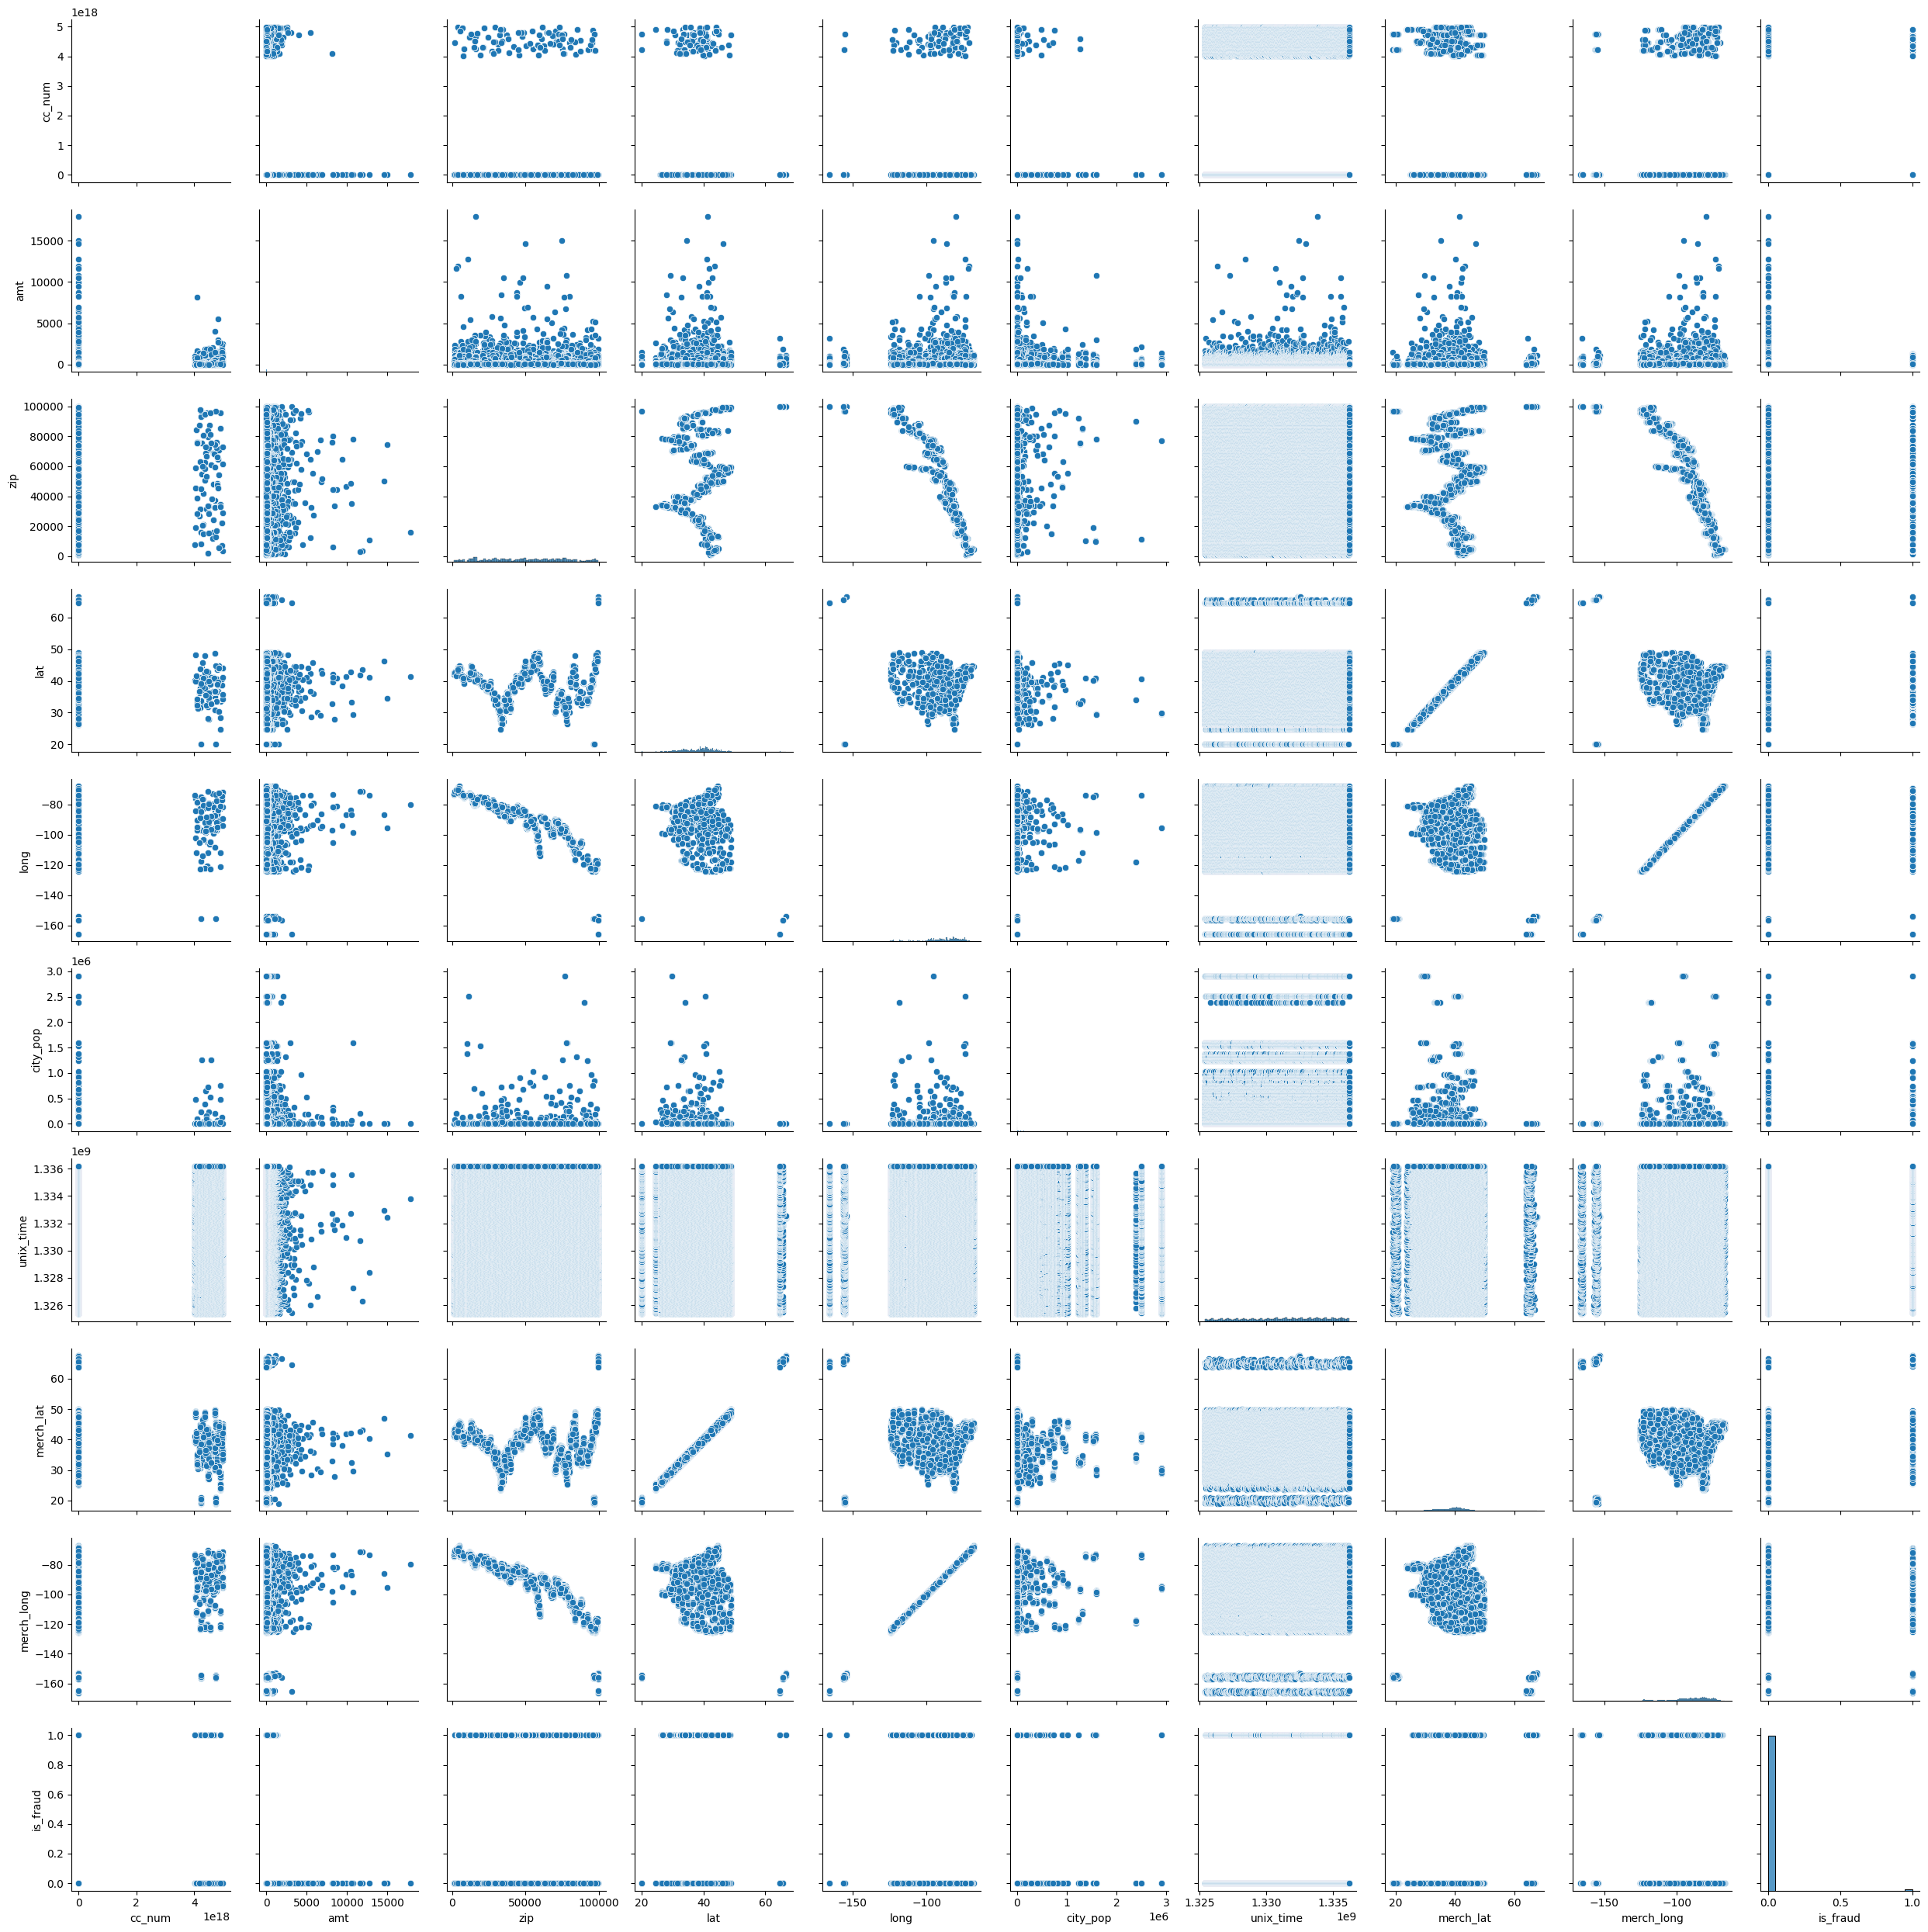

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
fraudTrain_data_cols = ['trans_date_trans_time','cc_num','amt','zip','lat','long','city_pop','dob','trans_num','unix_time','merch_lat','merch_long','is_fraud']

sns.pairplot(fraudTrain_data[fraudTrain_data_cols], height=2.5)

plt.tight_layout()
# plt.savefig('images/10_03.png', dpi=300)
plt.show()

**Convert data in data set**: 

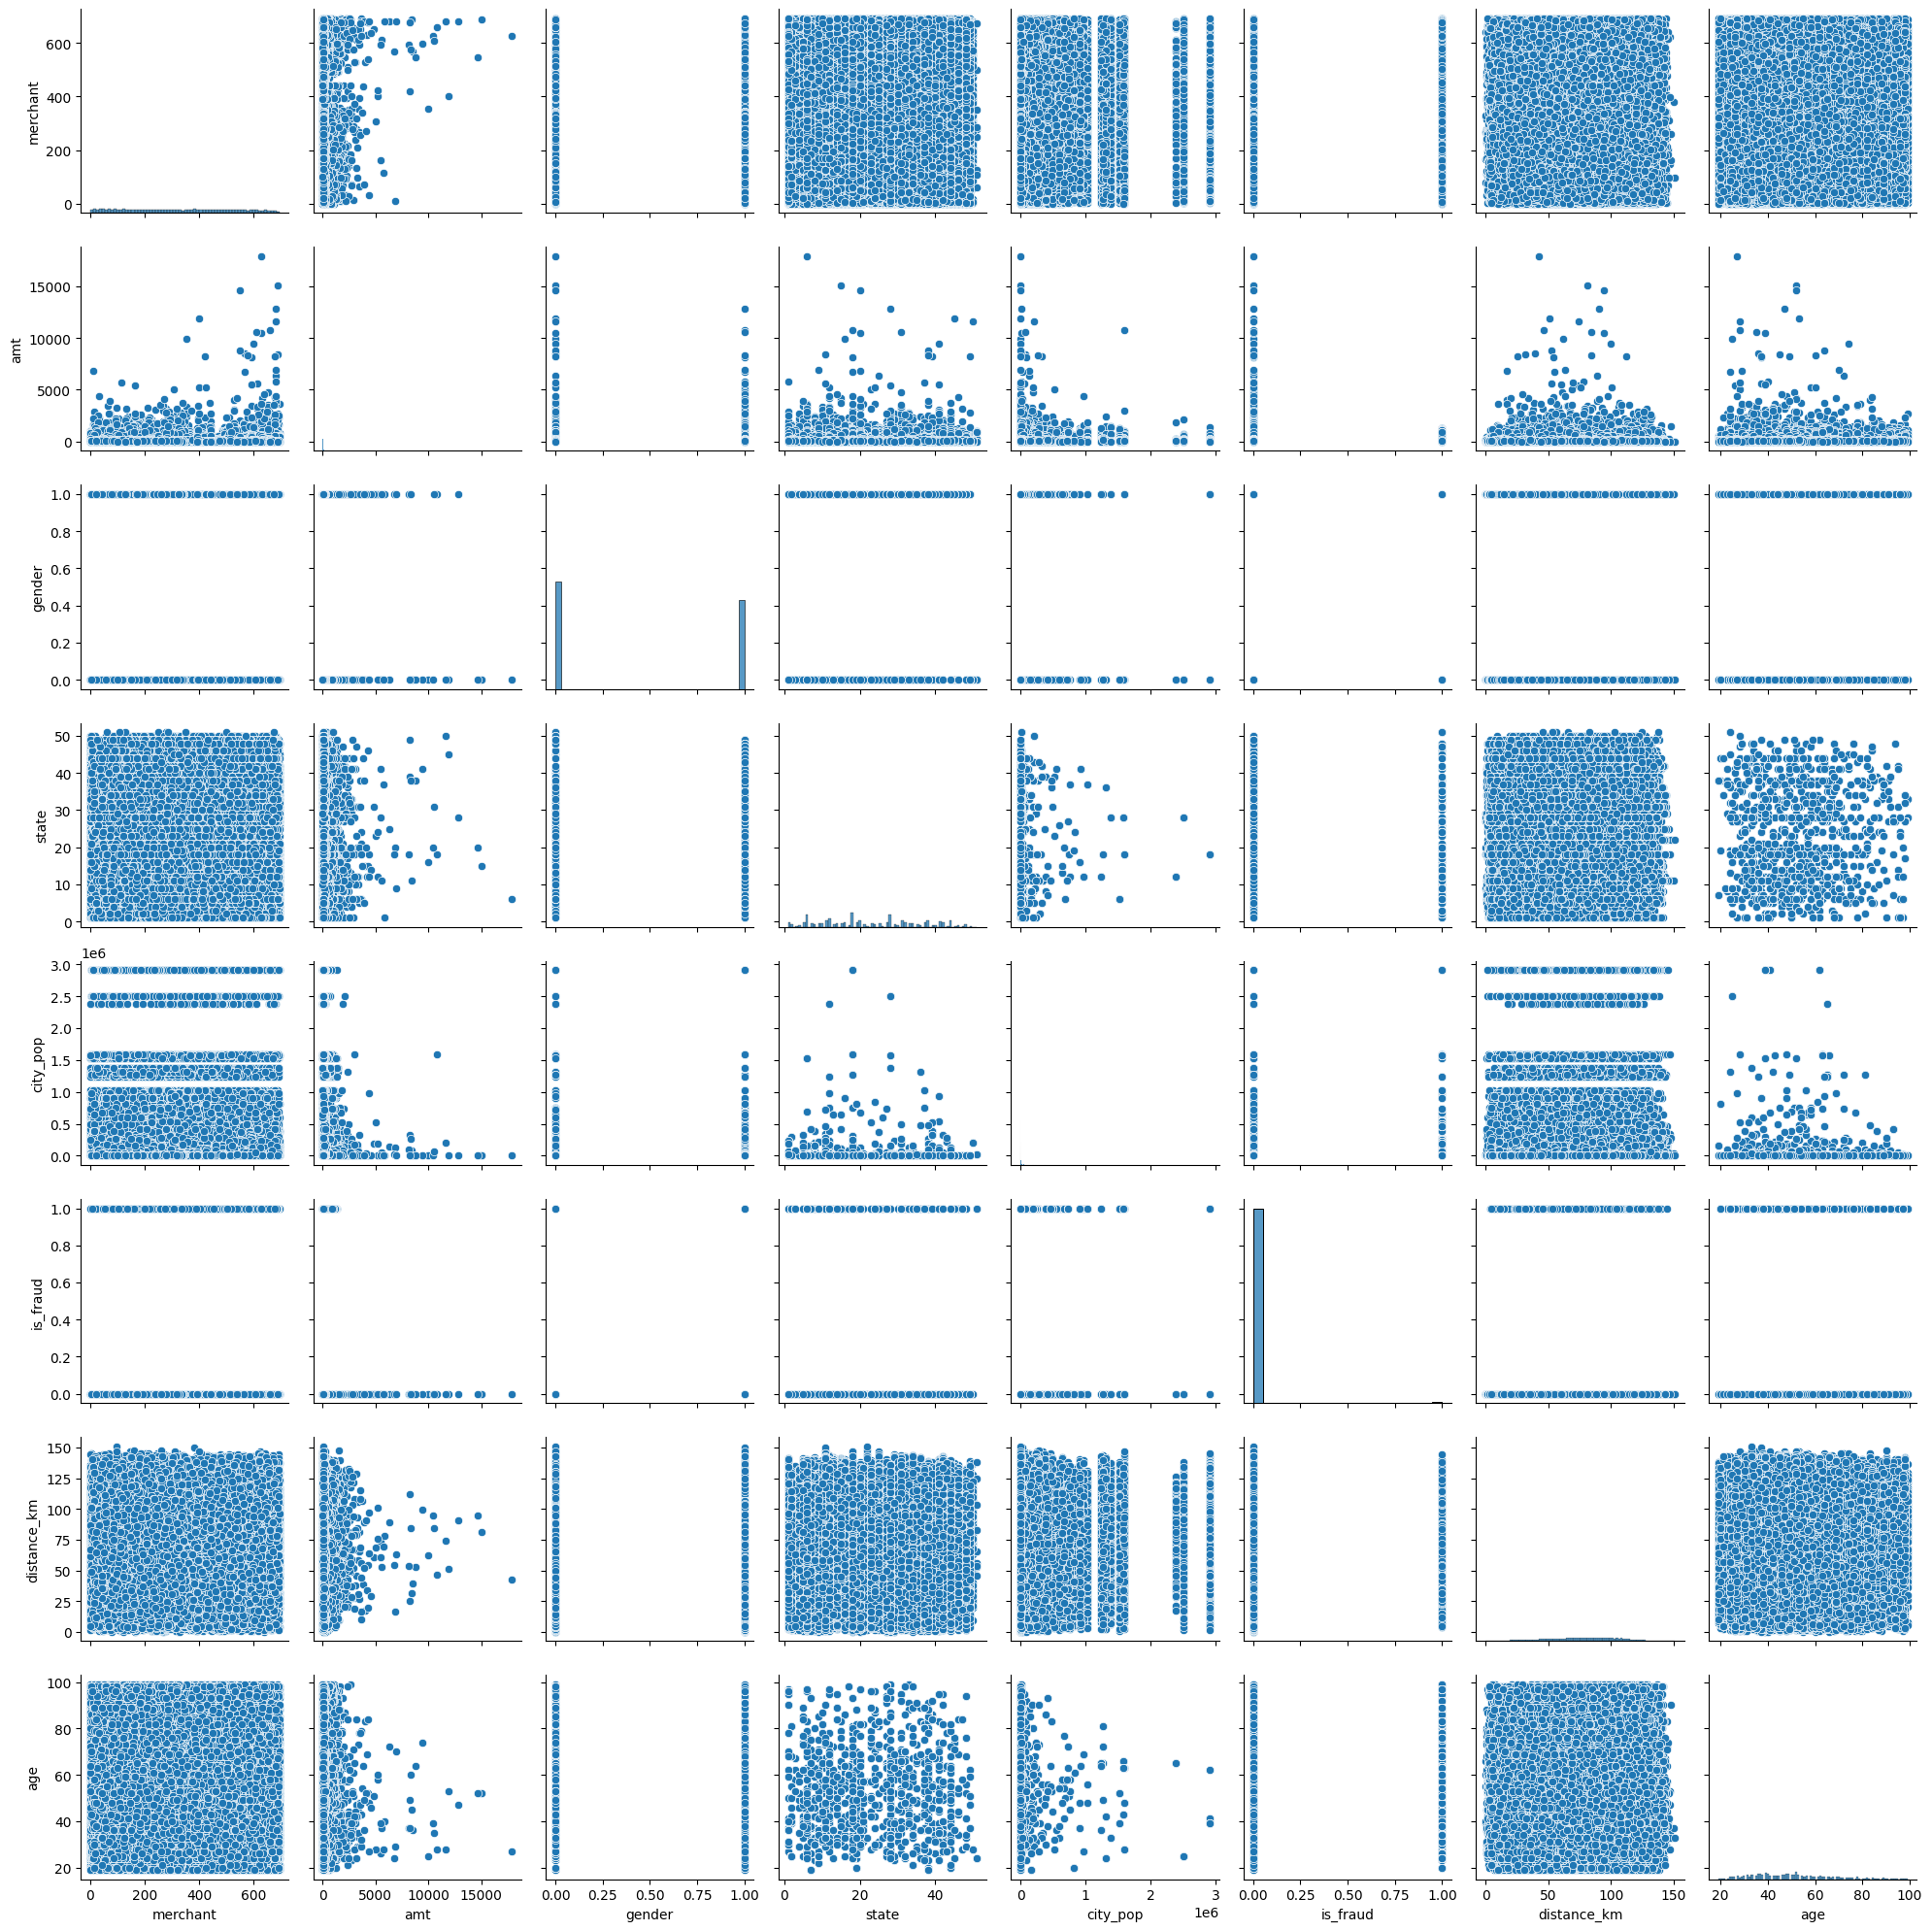

In [11]:
from datetime import datetime
import numpy as np

fraudTrain_data['gender'] = fraudTrain_data['gender'].replace({'F': 0, 'M': 1})

# Function to calculate distance using Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in kilometers
    lat1_rad, lon1_rad = np.radians(lat1), np.radians(lon1)
    lat2_rad, lon2_rad = np.radians(lat2), np.radians(lon2)
    
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad
    
    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    return R * c  # Distance in kilometers

# Calculate distance for each row
fraudTrain_data['distance_km'] = haversine(fraudTrain_data['lat'], fraudTrain_data['long'], fraudTrain_data['merch_lat'], fraudTrain_data['merch_long'])

# Replace 'state' column with numeric values from 1 to 52
fraudTrain_data['state'], unique_states = pd.factorize(fraudTrain_data['state'])
fraudTrain_data['state'] += 1  # Make it 1-based index

# Replace 'merchant' column with numeric values from 1 to X for each unique merchant
fraudTrain_data['merchant'], unique_merchants = pd.factorize(fraudTrain_data['merchant'])
fraudTrain_data['merchant'] += 1  # Make it 1-based index

def calculate_age(dob_str):
    dob = datetime.strptime(dob_str, '%Y-%m-%d')
    today = datetime.today()
    age = today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))
    return age

# Apply the function to the 'dob' column to create a new 'age' column
fraudTrain_data['age'] = fraudTrain_data['dob'].apply(calculate_age)

# Feature extraction:
fraudTrain_data_col2 = ['trans_date_trans_time','merchant','amt','gender','state','city_pop','is_fraud','distance_km','age']

sns.pairplot(fraudTrain_data[fraudTrain_data_col2], height=2.5)

plt.tight_layout()
# plt.savefig('images/10_03.png', dpi=300)
plt.show()



# Q3 - Correlation and Feature Selection

1. Compute correlation between numerical features.
2. Visualize correlations using a heatmap to identify highly correlated features.
3. Choose the most correlated feature with the target variable (`Value`) for simple linear regression.
4. **Discussion Question:** How do you interpret a correlation value? Does a higher correlation always mean a feature is more important?

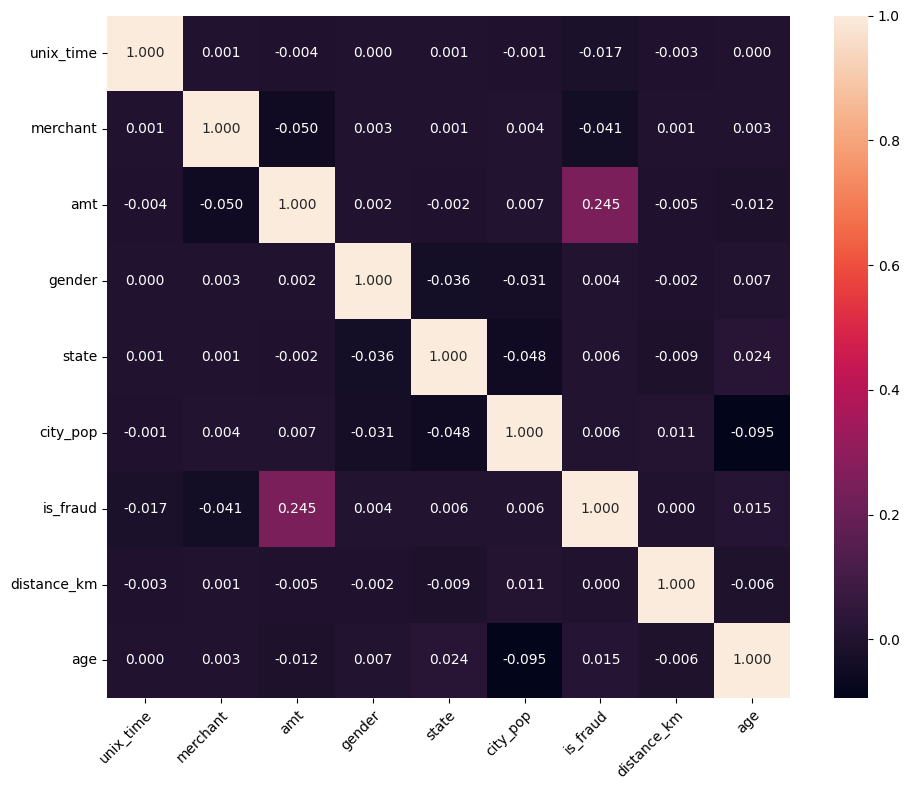

In [16]:
import numpy as np


# Feature extraction
#fraudTrain_data_col2 = ['trans_date_trans_time', 'merchant', 'amt', 'gender', 'state', 'city_pop', 'is_fraud', 'distance_km', 'age']
fraudTrain_data_col2 = ['unix_time','merchant', 'amt', 'gender', 'state', 'city_pop', 'is_fraud', 'distance_km', 'age']


# Filter for numeric columns only
numeric_columns = fraudTrain_data[fraudTrain_data_col2].select_dtypes(include=[np.number])


cm = np.corrcoef(fraudTrain_data[fraudTrain_data_col2].values.T)

#  figure size 
plt.figure(figsize=(10, 8)) 
# Adjust the width and height as needed
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.3f',
                 annot_kws={'size': 10},
                 yticklabels=fraudTrain_data_col2,
                 xticklabels=fraudTrain_data_col2)


# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
plt.tight_layout()
# plt.savefig('images/10_04.png', dpi=1200)
plt.show()